In [2]:
"""Write a program to implement the naïve Bayesian classifier for a sample training data set
stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.
Calculate the accuracy, precision, and recall for your data set"""

'Write a program to implement the naïve Bayesian classifier for a sample training data set\nstored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.\nCalculate the accuracy, precision, and recall for your data set'

In [80]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings

warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('adult.csv', header=None, sep=',\s')

In [82]:
df.shape

(32561, 15)

In [83]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [85]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
data.corr()
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
mp.show()

AttributeError: 'str' object has no attribute 'corr'

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [88]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [89]:
for var in categorical:    
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [90]:
for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


In [91]:
for var in categorical:
    for x in df[var]:
        if(x == "?"):
            print(var)
            break

workclass
occupation
native_country


In [92]:
df['workclass'].replace('?', np.NaN, inplace=True)
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [93]:
df['occupation'].replace('?', np.NaN, inplace=True)
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [94]:
df['native_country'].replace('?', np.NaN, inplace=True)
df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [95]:
for var in categorical:
    for x in df[var]:
        if(x == "?"):
            print(var)
            break

In [96]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [97]:
#cardinality
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [98]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [99]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [100]:
X = df.drop(['income'], axis=1)

y = df['income']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [102]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [103]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [104]:
X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [45]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  

In [105]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [106]:
X_test[categorical].isnull().sum()


workclass         560
education           0
marital_status      0
occupation        565
relationship        0
race                0
sex                 0
native_country    169
dtype: int64

In [107]:
X_train.isnull().sum()

age                  0
workclass         1276
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     414
dtype: int64

In [108]:
X_test.isnull().sum()

age                 0
workclass         560
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        565
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    169
dtype: int64

In [109]:
import category_encoders as ce

In [110]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [114]:
X_train.describe()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
count,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,...,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.597710,0.698754,0.039312,0.077790,0.055985,0.029484,0.033389,0.064716,0.000483,0.000088,...,0.000658,0.002545,0.002545,0.000439,0.003071,0.000614,0.001053,0.001009,0.000965,0.000044
std,13.610638,0.458809,0.194341,0.267847,0.229897,0.169163,0.179654,0.246029,0.021964,0.009367,...,0.025646,0.050382,0.050382,0.020942,0.055335,0.024777,0.032434,0.031751,0.031054,0.006624
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
X_train.corr()
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
mp.show()

AttributeError: 'str' object has no attribute 'corr'

In [112]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,workclass_9,...,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,native_country_42
32098,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
cols = X_train.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [55]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [56]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [57]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [58]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [60]:
y_pred = gnb.predict(X_test)

y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [61]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


In [62]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [63]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


In [64]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8083


In [65]:
y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

<AxesSubplot:>

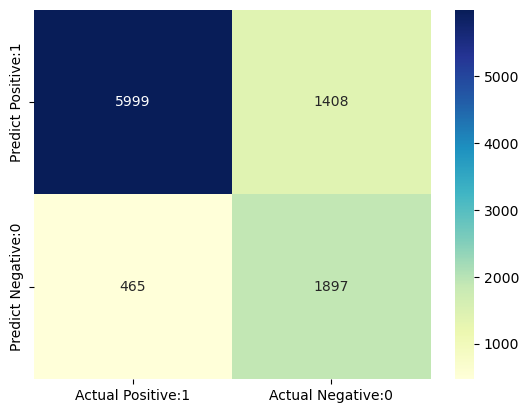

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8083


In [71]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1917


In [72]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8099


In [73]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9281


In [74]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

True Positive Rate : 0.9281
False Positive Rate : 0.4260


In [75]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       [1.73624321e-04, 9.99826376e-01],
       [8.20121011e-09, 9.99999992e-01],
       [8.76844580e-01, 1.23155420e-01],
       [9.99999927e-01, 7.32876705e-08],
       [9.99993460e-01, 6.53998797e-06],
       [9.87738143e-01, 1.22618575e-02],
       [9.99999996e-01, 4.01886317e-09]])

In [76]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


In [77]:
gnb.predict_proba(X_test)[0:10, 1]

array([5.74152436e-07, 3.12093456e-04, 8.45594398e-01, 9.99826376e-01,
       9.99999992e-01, 1.23155420e-01, 7.32876705e-08, 6.53998797e-06,
       1.22618575e-02, 4.01886317e-09])

Text(0, 0.5, 'Frequency')

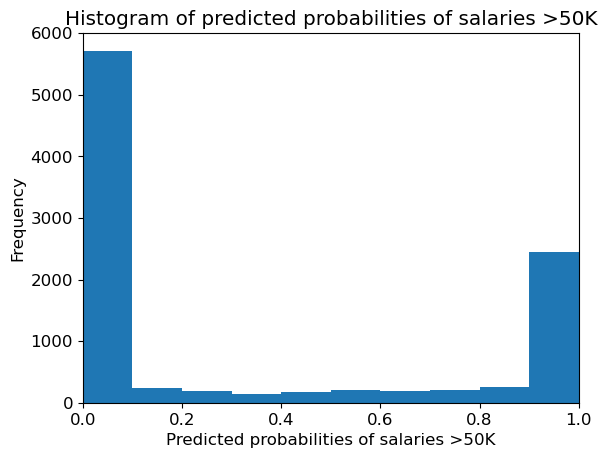

In [78]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

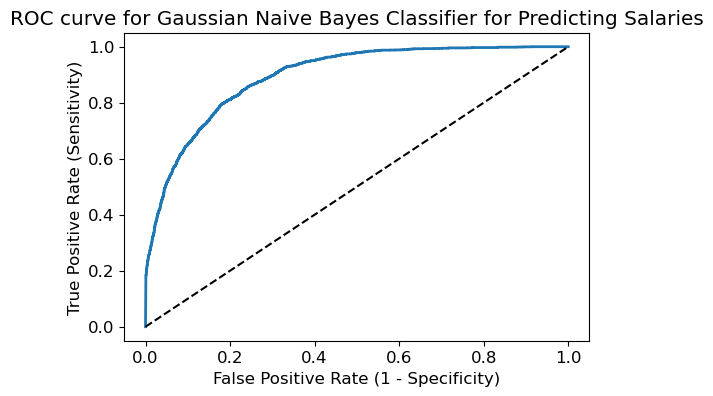

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()